In [6]:
from obspy import read
from obspy.core.util import get_example_file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import segyio
from stockwell import st

segyfile= read("./Train_data/SGY/1.sgy")

In [2]:
segyfile

33 Trace(s) in Stream:

Seq. No. in line: 37227 | 2020-09-22T22:12:56.000000Z - 2020-09-22T22:13:02.128000Z | 62.5 Hz, 384 samples
...
(31 other traces)
...
Seq. No. in line: 37259 | 2020-09-22T22:12:56.000000Z - 2020-09-22T22:13:02.128000Z | 62.5 Hz, 384 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [25]:
segyfile[20].times()

array([0.   , 0.016, 0.032, 0.048, 0.064, 0.08 , 0.096, 0.112, 0.128,
       0.144, 0.16 , 0.176, 0.192, 0.208, 0.224, 0.24 , 0.256, 0.272,
       0.288, 0.304, 0.32 , 0.336, 0.352, 0.368, 0.384, 0.4  , 0.416,
       0.432, 0.448, 0.464, 0.48 , 0.496, 0.512, 0.528, 0.544, 0.56 ,
       0.576, 0.592, 0.608, 0.624, 0.64 , 0.656, 0.672, 0.688, 0.704,
       0.72 , 0.736, 0.752, 0.768, 0.784, 0.8  , 0.816, 0.832, 0.848,
       0.864, 0.88 , 0.896, 0.912, 0.928, 0.944, 0.96 , 0.976, 0.992,
       1.008, 1.024, 1.04 , 1.056, 1.072, 1.088, 1.104, 1.12 , 1.136,
       1.152, 1.168, 1.184, 1.2  , 1.216, 1.232, 1.248, 1.264, 1.28 ,
       1.296, 1.312, 1.328, 1.344, 1.36 , 1.376, 1.392, 1.408, 1.424,
       1.44 , 1.456, 1.472, 1.488, 1.504, 1.52 , 1.536, 1.552, 1.568,
       1.584, 1.6  , 1.616, 1.632, 1.648, 1.664, 1.68 , 1.696, 1.712,
       1.728, 1.744, 1.76 , 1.776, 1.792, 1.808, 1.824, 1.84 , 1.856,
       1.872, 1.888, 1.904, 1.92 , 1.936, 1.952, 1.968, 1.984, 2.   ,
       2.016, 2.032,

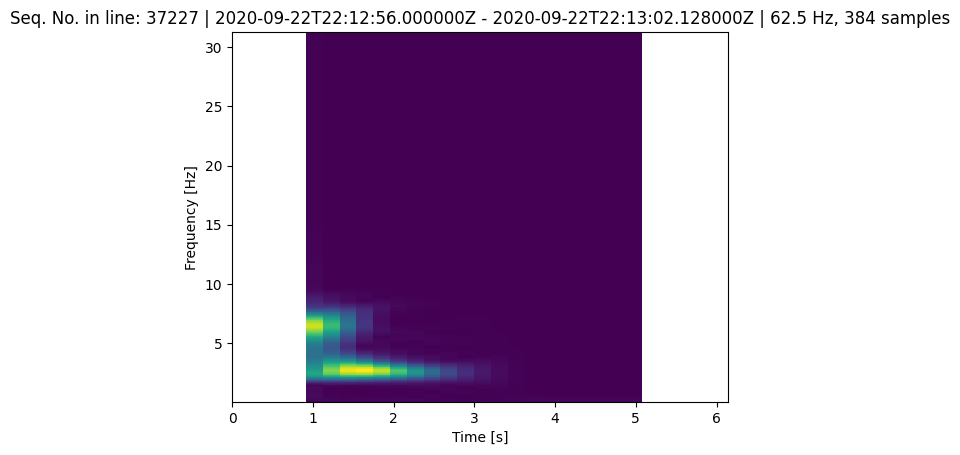

In [3]:
segyfile[0].spectrogram()

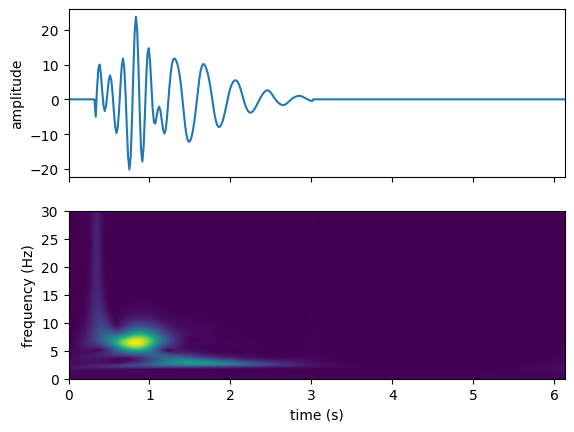

In [7]:


stock = st.st(segyfile[0].data, 0, int(30/(1./(segyfile[0].times()[-1]-segyfile[0].times()[0]))))
extent = (segyfile[0].times()[0], segyfile[0].times()[-1], 0, 30)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(segyfile[0].times(), segyfile[0].data)
ax[0].set(ylabel='amplitude')
ax[1].imshow(np.abs(stock), origin='lower', extent=extent)
ax[1].axis('tight')
ax[1].set(xlabel='time (s)', ylabel='frequency (Hz)')
plt.show()

In [ ]:
#TODO Так для каждого. Первый этап готов к получению дисперсионной кривой

#TODO: Достать дистанцию из трейса, попробовать сделать 3д модель 

In [7]:
segyfile[0].data

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.95586777e+00,  3.02531719e+00,  8.65607071e+00,
        9.98785496e+00,  7.22640133e+00,  2.40107059e+00, -1.79897308e+00,
       -3.36553478e+00, -1.82833099e+00,  1.70798683e+00,  5.24522972e+00,
        6.87850094e+00,  5.61831760e+00,  1.74399376e+00, -3.36398697e+00,
       -7.76880264e+00, -9.67816639e+00, -8.09425640e+00, -3.24562550e+00,
        3.33584690e+00,  9.18665409e+00,  1.17187071e+01,  9.26519394e+00,
        1.97805023e+00, -7.87869358e+00, -1.65352783e+01, -2.01381378e+01,
       -1.64618835e+01, -6.12750149e+00,  7.34438419e+00,  1.88226013e+01,
        2.37171326e+01,  

In [9]:
segyfile[0].stats

         network: 
         station: 
        location: 
         channel: 
       starttime: 2020-09-22T22:12:56.000000Z
         endtime: 2020-09-22T22:13:02.128000Z
   sampling_rate: 62.5
           delta: 0.016
            npts: 384
           calib: 1.0
         _format: SEGY
            segy: AttribDict({'trace_header': LazyTraceHeaderAttribDict({'unpacked_header': b'k\x91\x00\x00\x00\x00\x00\x00\x99\x04\x00\x00\xb1\x01\x00\x00\x00\x00\x00\x00\xbf\x1e\xd5\x00\x00\x00\x00\x00\x01\x00\x00\x00\x01\x00\x00\x00e\x00\x00\x00F\x00\x00\x00\x00\x00\x00\x00<\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x00\x00\x00\x00\x00\x00\x00\xf6\xff\xf6\xff\xea\x95J\x00\x14;\x90\x04\xf4\x96J\x00\xec>\x90\x04\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x01\x80>\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe4\x07\n\x01\x16\x00\x0c\

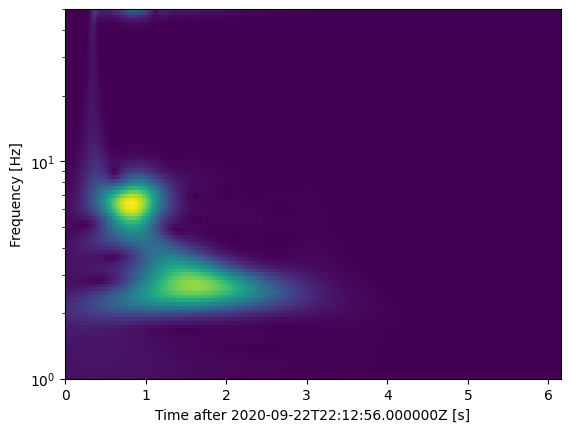

In [22]:
import obspy
from obspy.imaging.cm import obspy_sequential
from obspy.signal.tf_misfit import cwt

tr = segyfile[0]
npts = tr.stats.npts
dt = tr.stats.delta
t = np.linspace(0, dt * npts, npts)
f_min = 1
f_max = 50

scalogram = cwt(tr.data, dt, 8, f_min, f_max)

fig = plt.figure()
ax = fig.add_subplot(111)

x, y = np.meshgrid(
    t,
    np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))

ax.pcolormesh(x, y, np.abs(scalogram), cmap=obspy_sequential)
ax.set_xlabel("Time after %s [s]" % tr.stats.starttime)
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.show()

In [27]:
from scipy.signal import find_peaks

# Пример генерации синтетических данных спектрограммы
time = segyfile[0].times()  # время в секундах
depth = segyfile[0].data  # глубина в метрах
frequency = np.sin(2 * np.pi * time) * np.exp(-depth[:, None] / 100)
frequency

array([[0.        , 0.10036171, 0.19970998, ..., 0.56726895, 0.64705596,
        0.72030902],
       [0.        , 0.10036171, 0.19970998, ..., 0.56726895, 0.64705596,
        0.72030902],
       [0.        , 0.10036171, 0.19970998, ..., 0.56726895, 0.64705596,
        0.72030902],
       ...,
       [0.        , 0.10036171, 0.19970998, ..., 0.56726895, 0.64705596,
        0.72030902],
       [0.        , 0.10036171, 0.19970998, ..., 0.56726895, 0.64705596,
        0.72030902],
       [0.        , 0.10036171, 0.19970998, ..., 0.56726895, 0.64705596,
        0.72030902]])

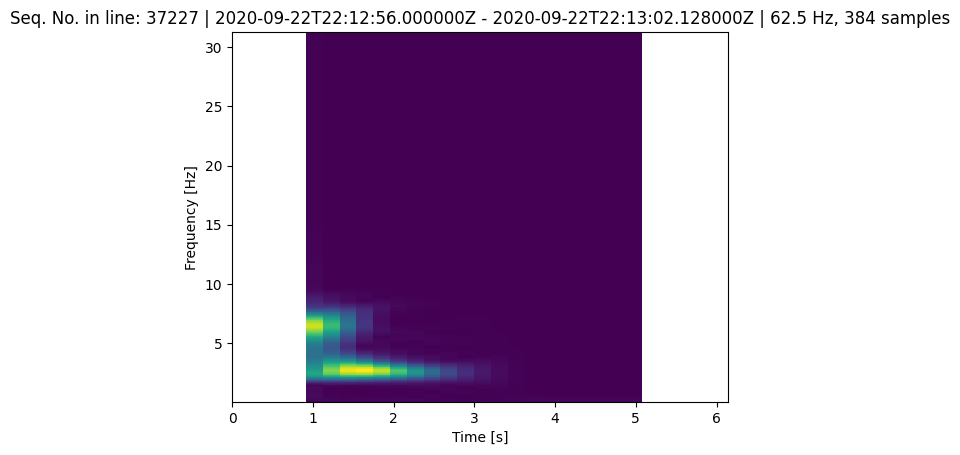

In [31]:
segyfile[0].spectrogram().

In [28]:
# Имитация спектрограммы (замена реальными данными)
spectrogram = np.abs(frequency)
spectrogram

array([[0.        , 0.10036171, 0.19970998, ..., 0.56726895, 0.64705596,
        0.72030902],
       [0.        , 0.10036171, 0.19970998, ..., 0.56726895, 0.64705596,
        0.72030902],
       [0.        , 0.10036171, 0.19970998, ..., 0.56726895, 0.64705596,
        0.72030902],
       ...,
       [0.        , 0.10036171, 0.19970998, ..., 0.56726895, 0.64705596,
        0.72030902],
       [0.        , 0.10036171, 0.19970998, ..., 0.56726895, 0.64705596,
        0.72030902],
       [0.        , 0.10036171, 0.19970998, ..., 0.56726895, 0.64705596,
        0.72030902]])

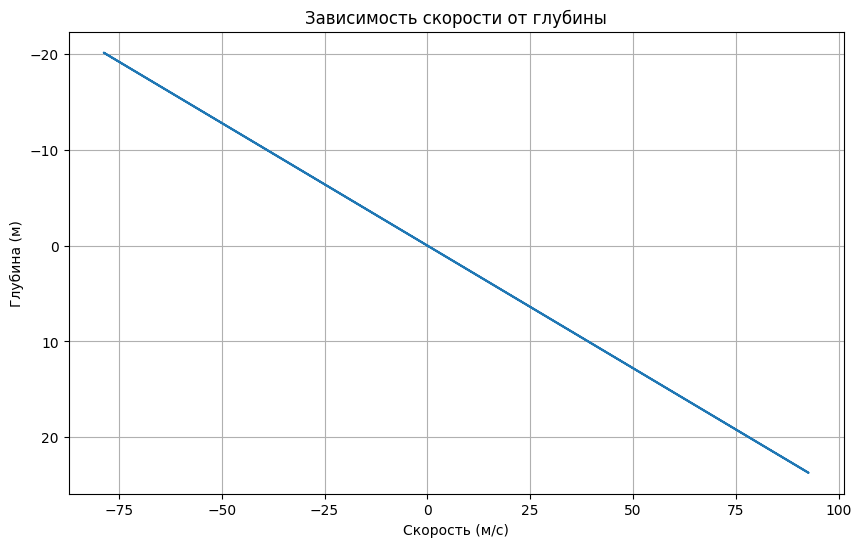

In [29]:
# Извлечение временных задержек (примерный метод)
delays = []
for i in range(spectrogram.shape[0]):
    peaks, _ = find_peaks(spectrogram[i, :], height=0.1)
    if len(peaks) > 0:
        delays.append(time[peaks[0]])
    else:
        delays.append(np.nan)

# Преобразование временных задержек в скорости
delays = np.array(delays)
valid_idx = ~np.isnan(delays)
depth_valid = depth[valid_idx]
delays_valid = delays[valid_idx]
speed = depth_valid / delays_valid

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(speed, depth_valid)
plt.gca().invert_yaxis()
plt.xlabel('Скорость (м/с)')
plt.ylabel('Глубина (м)')
plt.title('Зависимость скорости от глубины')
plt.grid(True)
plt.show()

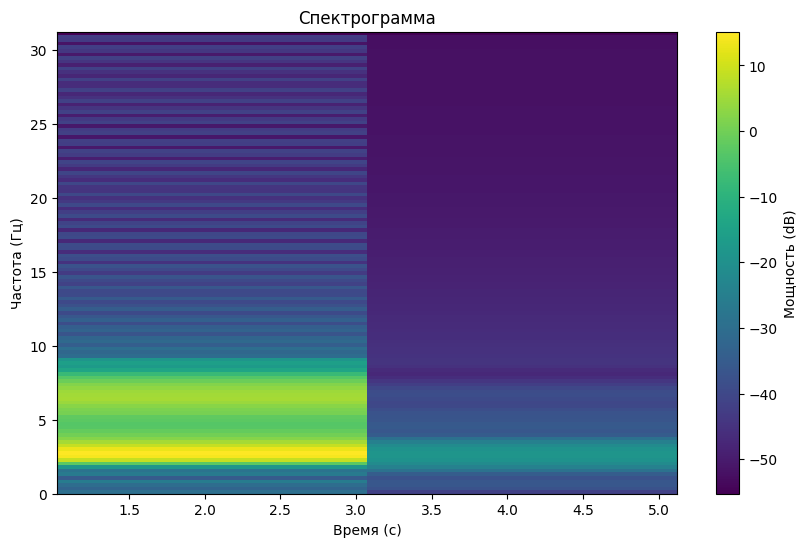

In [34]:
stream = segyfile.copy()
trace_data = []
for trace in stream.traces:
    trace_data.append(trace.data)
trace_data = np.array(trace_data)

# Параметры спектрограммы
nfft = 256  # количество точек FFT
noverlap = 128  # количество перекрытий
fs = 1.0 / 16000 * 1e6  # частота дискретизации

# Выбор трассы для анализа (например, первой трассы)
trace = trace_data[0, :]

# Создание спектрограммы
plt.figure(figsize=(10, 6))
plt.specgram(trace, NFFT=nfft, Fs=fs, noverlap=noverlap, cmap='viridis')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.title('Спектрограмма')
plt.colorbar(label='Мощность (dB)')
plt.show()

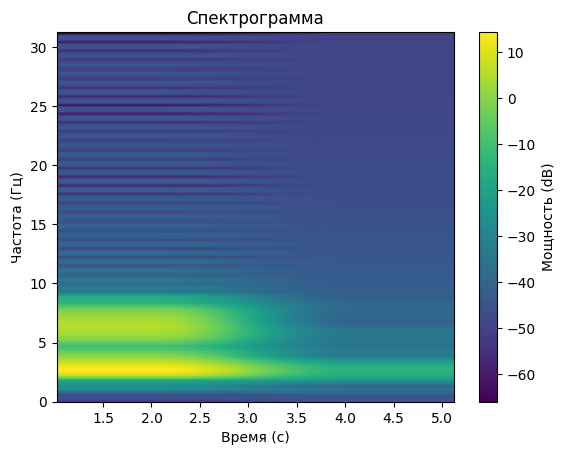

In [36]:
# Выбор трассы для анализа (например, первой трассы)
trace = trace_data[1, :]

# Создание спектрограммы
Pxx, freqs, bins, im = plt.specgram(trace, NFFT=nfft, Fs=fs, noverlap=noverlap, cmap='viridis')
plt.xlabel('Время (с)')
plt.ylabel('Частота (Гц)')
plt.title('Спектрограмма')
plt.colorbar(label='Мощность (dB)')
plt.show()

In [39]:
# Извлечение временных задержек для каждой частоты
time_delays = []
for i in range(len(freqs)):
    # Извлекаем столбец мощностей для текущей частоты
    power_col = Pxx[i, :]
    # Находим пики
    peaks, _ = find_peaks(power_col, height=np.mean(power_col))
    if len(peaks) > 0:
        time_delays.append(bins[peaks[0]])
    else:
        time_delays.append(np.nan)

time_delays = np.array(time_delays)
time_delays

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

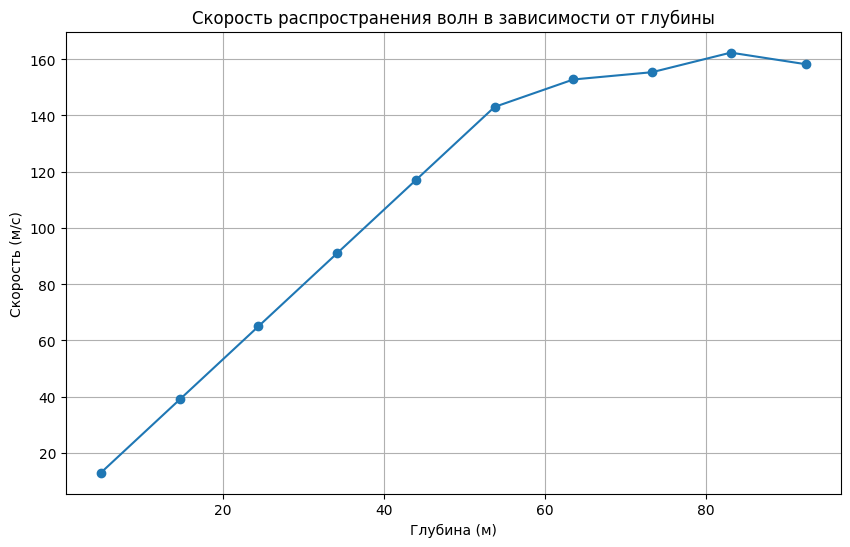

In [103]:
# Получение данных из файла
stream = segyfile.copy()
traces = [tr.data for tr in stream.traces]

# Предполагаем, что время семплирования известно (в микросекундах)
sampling_interval = 16000 / 1e6  # перевод в секунды
n_samples = len(traces[0])

# Генерация временной оси
time_axis = np.arange(n_samples) * sampling_interval

# Глубины в метрах (заданные значения)
depths = np.array([4.889, 14.667, 24.444, 34.222, 44, 53.778,63.556,73.333,83.111,92.4])

# Время прибытия волн для каждой глубины (предполагаем, что это будет пик сигнала)
arrival_times = np.zeros((len(traces), len(depths)))

for i, trace in enumerate(traces):
    # Поиск пиков на трассе (можно использовать разные подходы для этого)
    peaks, _ = find_peaks(trace, height=0)
    peak_times = peaks * sampling_interval
    
    # Выбор ближайших пиков к ожидаемым временам прибытия (примерный подход)
    for j, depth in enumerate(depths):
        expected_time = 2 * depth / 160  # например, средняя скорость 1500 м/с
        closest_peak = peak_times[np.argmin(np.abs(peak_times - expected_time))]
        arrival_times[i, j] = closest_peak

# Расчет скоростей
velocities = np.zeros(len(depths))

for j, depth in enumerate(depths):
    t_arrival = np.median(arrival_times[:, j])
    velocities[j] = 2 * depth / t_arrival

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(depths, velocities, marker='o')
plt.xlabel('Глубина (м)')
plt.ylabel('Скорость (м/с)')
plt.title('Скорость распространения волн в зависимости от глубины')
plt.grid(True)
plt.show()

In [104]:
velocities

array([ 13.00265957,  39.00797872,  65.0106383 ,  91.01595745,
       117.0212766 , 143.02659574, 152.77884615, 155.36652542,
       162.32617188, 158.21917808])

In [75]:
real_vel = np.array([131.861,143.536,230.461,279.696, 297.708,303.326,304.863,305.23,305.316,305.335])

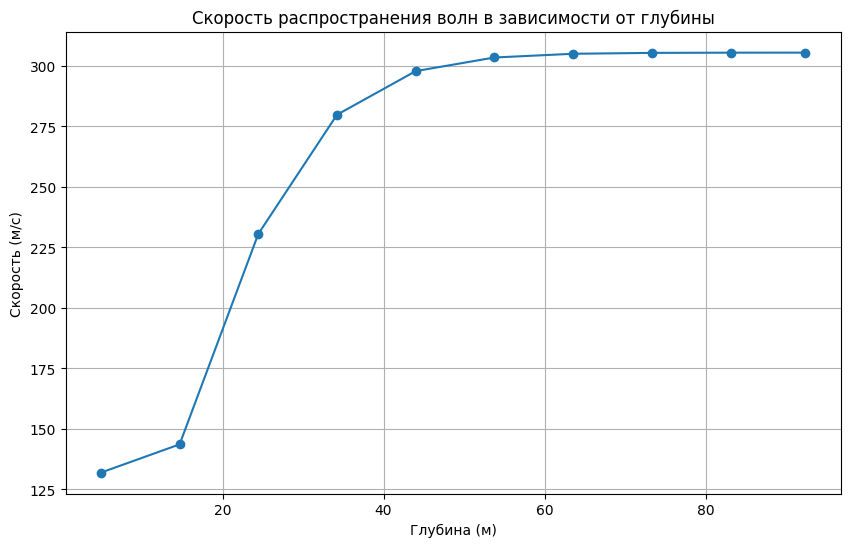

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(depths, real_vel, marker='o')
plt.xlabel('Глубина (м)')
plt.ylabel('Скорость (м/с)')
plt.title('Скорость распространения волн в зависимости от глубины')
plt.grid(True)
plt.show()

In [77]:
arrival_times

array([[0.384, 0.384, 0.672, 0.832, 0.992, 1.312, 1.664, 1.664, 2.064,
        2.464],
       [0.4  , 0.4  , 0.544, 0.88 , 1.168, 1.392, 1.744, 1.744, 2.128,
        2.128],
       [0.416, 0.416, 0.56 , 0.912, 1.072, 1.456, 1.456, 1.808, 2.176,
        2.176],
       [0.432, 0.432, 0.576, 0.784, 1.104, 1.312, 1.568, 1.872, 2.24 ,
        2.24 ],
       [0.448, 0.448, 0.56 , 0.832, 1.184, 1.36 , 1.632, 1.936, 1.936,
        2.304],
       [0.464, 0.464, 0.576, 0.864, 1.024, 1.408, 1.536, 1.68 , 2.032,
        2.384],
       [0.48 , 0.48 , 0.592, 0.896, 1.056, 1.296, 1.584, 1.856, 2.096,
        2.448],
       [0.496, 0.496, 0.608, 0.928, 1.088, 1.328, 1.632, 1.92 , 2.16 ,
        2.16 ],
       [0.512, 0.512, 0.624, 0.8  , 1.12 , 1.376, 1.536, 1.68 , 2.   ,
        2.256],
       [0.528, 0.528, 0.64 , 0.816, 1.152, 1.408, 1.584, 1.872, 2.08 ,
        2.336],
       [0.544, 0.544, 0.656, 0.848, 1.024, 1.28 , 1.632, 1.776, 2.192,
        2.192],
       [0.56 , 0.56 , 0.56 , 0.88 , 1.056, 

In [79]:
stream = segyfile.copy()
traces = [tr.data for tr in stream.traces]

# Предполагаем, что время семплирования известно (в микросекундах)
sampling_interval = 16000 / 1e6  # перевод в секунды
n_samples = len(traces[0])

# Генерация временной оси
time_axis = np.arange(n_samples) * sampling_interval

# Глубины в метрах (заданные значения)
depths = np.array([4.889, 14.667, 24.444, 34.222, 44, 53.778,63.556,73.333,83.111,92.4])

# Время прибытия волн для каждой глубины (предполагаем, что это будет пик сигнала)
arrival_times = np.zeros((len(traces), len(depths)))

for i, trace in enumerate(traces):
    # Поиск пиков на трассе (можно использовать разные подходы для этого)
    peaks, _ = find_peaks(trace, height=0)
    peak_times = peaks * sampling_interval
    print(peaks)
    print(peak_times)

[ 24  32  42  52  62  82 104 129 154 178]
[0.384 0.512 0.672 0.832 0.992 1.312 1.664 2.064 2.464 2.848]
[ 25  34  45  55  64  73  87 109 133 157 181]
[0.4   0.544 0.72  0.88  1.024 1.168 1.392 1.744 2.128 2.512 2.896]
[ 26  35  47  57  67  77  91 113 136 160 185]
[0.416 0.56  0.752 0.912 1.072 1.232 1.456 1.808 2.176 2.56  2.96 ]
[ 27  36  49  59  69  82  92  98 117 140 164 189 209]
[0.432 0.576 0.784 0.944 1.104 1.312 1.472 1.568 1.872 2.24  2.624 3.024
 3.344]
[ 28  35  42  52  62  74  85  94 102 121 144 168 193 216]
[0.448 0.56  0.672 0.832 0.992 1.184 1.36  1.504 1.632 1.936 2.304 2.688
 3.088 3.456]
[ 29  36  44  54  64  78  88  96 105 127 149 172 197 221]
[0.464 0.576 0.704 0.864 1.024 1.248 1.408 1.536 1.68  2.032 2.384 2.752
 3.152 3.536]
[ 30  37  46  56  66  81  90  99 116 131 153 176 201 225]
[0.48  0.592 0.736 0.896 1.056 1.296 1.44  1.584 1.856 2.096 2.448 2.816
 3.216 3.6  ]
[ 31  38  48  58  68  83  93 102 120 135 157 180 204 229]
[0.496 0.608 0.768 0.928 1.088 1.328 1.4

In [93]:
peaks, _ = find_peaks(traces[0], height=0)
peak_times = peaks * sampling_interval
print(peak_times)
print(peak_times - pd.Series(peak_times).shift().values)
print(peak_times/pd.Series(peak_times).shift().values)

[0.384 0.512 0.672 0.832 0.992 1.312 1.664 2.064 2.464 2.848]
[  nan 0.128 0.16  0.16  0.16  0.32  0.352 0.4   0.4   0.384]
[       nan 1.33333333 1.3125     1.23809524 1.19230769 1.32258065
 1.26829268 1.24038462 1.19379845 1.15584416]


In [94]:
peaks, _ = find_peaks(traces[20], height=0)
peak_times = peaks * sampling_interval
print(peak_times)
print(peak_times - pd.Series(peak_times).shift().values)
print(peak_times/pd.Series(peak_times).shift().values)

[0.8   1.376 1.536 1.68  1.856 2.032 2.256 2.416 2.576 2.736 2.88  3.04
 3.536 3.872 4.128 4.448 4.816 5.2  ]
[  nan 0.576 0.16  0.144 0.176 0.176 0.224 0.16  0.16  0.16  0.144 0.16
 0.496 0.336 0.256 0.32  0.368 0.384]
[       nan 1.72       1.11627907 1.09375    1.1047619  1.09482759
 1.11023622 1.07092199 1.06622517 1.0621118  1.05263158 1.05555556
 1.16315789 1.09502262 1.0661157  1.07751938 1.08273381 1.07973422]


In [95]:
peaks, _ = find_peaks(traces[32], height=0)
peak_times = peaks * sampling_interval
print(peak_times)
print(peak_times - pd.Series(peak_times).shift().values)
print(peak_times/pd.Series(peak_times).shift().values)

[1.168 1.6   1.728 1.888 2.112 2.288 2.432 2.56  2.736 2.928 3.12  3.28
 3.44  3.6   3.744 3.904 4.016 4.352 4.56  4.864 5.392 5.728 6.   ]
[  nan 0.432 0.128 0.16  0.224 0.176 0.144 0.128 0.176 0.192 0.192 0.16
 0.16  0.16  0.144 0.16  0.112 0.336 0.208 0.304 0.528 0.336 0.272]
[       nan 1.36986301 1.08       1.09259259 1.11864407 1.08333333
 1.06293706 1.05263158 1.06875    1.07017544 1.06557377 1.05128205
 1.04878049 1.04651163 1.04       1.04273504 1.02868852 1.08366534
 1.04779412 1.06666667 1.10855263 1.06231454 1.04748603]


In [98]:
peaks_traces = []
for i, trace in enumerate(traces):
    # Поиск пиков на трассе (можно использовать разные подходы для этого)
    peaks, _ = find_peaks(trace, height=0)
    peak_times = (peaks * sampling_interval)[:10]
    peaks_traces.append(peak_times)
np.array(peaks_traces)

array([[0.384, 0.512, 0.672, 0.832, 0.992, 1.312, 1.664, 2.064, 2.464,
        2.848],
       [0.4  , 0.544, 0.72 , 0.88 , 1.024, 1.168, 1.392, 1.744, 2.128,
        2.512],
       [0.416, 0.56 , 0.752, 0.912, 1.072, 1.232, 1.456, 1.808, 2.176,
        2.56 ],
       [0.432, 0.576, 0.784, 0.944, 1.104, 1.312, 1.472, 1.568, 1.872,
        2.24 ],
       [0.448, 0.56 , 0.672, 0.832, 0.992, 1.184, 1.36 , 1.504, 1.632,
        1.936],
       [0.464, 0.576, 0.704, 0.864, 1.024, 1.248, 1.408, 1.536, 1.68 ,
        2.032],
       [0.48 , 0.592, 0.736, 0.896, 1.056, 1.296, 1.44 , 1.584, 1.856,
        2.096],
       [0.496, 0.608, 0.768, 0.928, 1.088, 1.328, 1.488, 1.632, 1.92 ,
        2.16 ],
       [0.512, 0.624, 0.8  , 0.96 , 1.12 , 1.376, 1.536, 1.68 , 2.   ,
        2.256],
       [0.528, 0.64 , 0.816, 0.992, 1.152, 1.248, 1.408, 1.584, 1.728,
        1.872],
       [0.544, 0.656, 0.848, 1.024, 1.184, 1.28 , 1.456, 1.632, 1.776,
        1.936],
       [0.56 , 0.672, 0.88 , 1.056, 1.216, 

In [106]:
np.array(peaks_traces).T

array([[0.384, 0.4  , 0.416, 0.432, 0.448, 0.464, 0.48 , 0.496, 0.512,
        0.528, 0.544, 0.56 , 0.688, 0.72 , 0.736, 0.816, 0.752, 0.752,
        0.752, 0.768, 0.8  , 0.928, 0.976, 1.024, 1.072, 1.12 , 1.28 ,
        0.896, 0.912, 0.944, 1.04 , 1.104, 1.168],
       [0.512, 0.544, 0.56 , 0.576, 0.56 , 0.576, 0.592, 0.608, 0.624,
        0.64 , 0.656, 0.672, 0.912, 0.944, 0.96 , 0.992, 0.848, 0.864,
        0.88 , 1.104, 1.376, 1.408, 1.168, 1.184, 1.216, 1.248, 1.712,
        1.312, 1.36 , 1.376, 1.552, 1.568, 1.6  ],
       [0.672, 0.72 , 0.752, 0.784, 0.672, 0.704, 0.736, 0.768, 0.8  ,
        0.816, 0.848, 0.88 , 1.088, 1.12 , 1.152, 1.168, 1.024, 1.04 ,
        1.072, 1.344, 1.536, 1.568, 1.44 , 1.488, 1.504, 1.68 , 1.888,
        1.456, 1.488, 1.52 , 1.664, 1.696, 1.728],
       [0.832, 0.88 , 0.912, 0.944, 0.832, 0.864, 0.896, 0.928, 0.96 ,
        0.992, 1.024, 1.056, 1.264, 1.312, 1.36 , 1.392, 1.2  , 1.232,
        1.28 , 1.504, 1.68 , 1.712, 1.6  , 1.632, 1.664, 1.84 , 2.

In [107]:
U, s, W = np.linalg.svd(np.array(peaks_traces))
s

array([31.26852043,  2.40458285,  0.43797863,  0.35645396,  0.26762541,
        0.22626936,  0.16116987,  0.12011032,  0.08877036,  0.05719188])

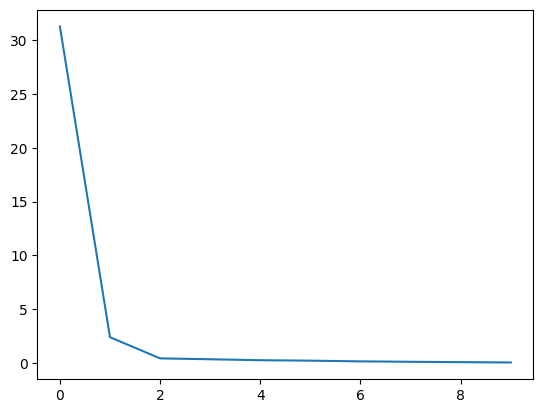

In [111]:
plt.plot(s)

In [112]:
sfy_files_s = []
for i in range(1, 11):    
    segyfile = read(f"./Train_data/SGY/{i}.sgy")
    traces = [tr for tr in segyfile.traces]
    peaks_traces = []
    for i, trace in enumerate(traces):
        # Поиск пиков на трассе (можно использовать разные подходы для этого)
        peaks, _ = find_peaks(trace, height=0)
        peak_times = (peaks * sampling_interval)[:10]
        peaks_traces.append(peak_times)
    peaks_traces = np.array(peaks_traces)
    U, s, W = np.linalg.svd(peaks_traces)
    sfy_files_s.append(s)

In [113]:
sfy_files_s

[array([31.26852043,  2.40458285,  0.43797863,  0.35645396,  0.26762541,
         0.22626936,  0.16116987,  0.12011032,  0.08877036,  0.05719188]),
 array([30.43608054,  2.37194309,  0.55715851,  0.43767931,  0.24400588,
         0.16874357,  0.13261448,  0.09430993,  0.06183731,  0.04720454]),
 array([30.10285464,  2.35719261,  0.58799492,  0.36565445,  0.22702627,
         0.18970014,  0.12034147,  0.10890285,  0.06015889,  0.03867873]),
 array([28.90955121,  2.2248362 ,  0.46219465,  0.35347192,  0.25046431,
         0.15832707,  0.13626297,  0.09826891,  0.0647643 ,  0.05169145]),
 array([28.55500866,  2.15592602,  0.49784755,  0.3692352 ,  0.27794851,
         0.17787726,  0.14275588,  0.1310176 ,  0.08450714,  0.04116402]),
 array([29.05092745,  2.34006589,  0.53750367,  0.37254453,  0.2995408 ,
         0.16986839,  0.13120371,  0.10941435,  0.07994864,  0.05115345]),
 array([30.38016334,  2.45390636,  0.54532296,  0.40734648,  0.31836483,
         0.22141009,  0.11879188,  0.10

In [114]:
X = pd.DataFrame(sfy_files_s)

In [115]:
X

,0,1,2,3,4,5,6,7,8,9
0,31.268520,2.404583,0.437979,0.356454,0.267625,0.226269,0.161170,0.120110,0.088770,0.057192
1,30.436081,2.371943,0.557159,0.437679,0.244006,0.168744,0.132614,0.094310,0.061837,0.047205
2,30.102855,2.357193,0.587995,0.365654,0.227026,0.189700,0.120341,0.108903,0.060159,0.038679
3,28.909551,2.224836,0.462195,0.353472,0.250464,0.158327,0.136263,0.098269,0.064764,0.051691
4,28.555009,2.155926,0.497848,0.369235,0.277949,0.177877,0.142756,0.131018,0.084507,0.041164
5,29.050927,2.340066,0.537504,0.372545,0.299541,0.169868,0.131204,0.109414,0.079949,0.051153
6,30.380163,2.453906,0.545323,0.407346,0.318365,0.221410,0.118792,0.105921,0.076386,0.041166
7,29.413033,2.460515,0.531632,0.451822,0.278455,0.206729,0.141046,0.093872,0.068604,0.052600
8,29.643834,2.241569,0.478026,0.339910,0.285671,0.212876,0.100620,0.083816,0.060146,0.033911
9,29.605434,2.234009,0.783044,0.402265,0.329227,0.247210,0.168764,0.134544,0.081176,0.041901


In [117]:
data = pd.read_csv(f"./Train_data/TXT/{1}.txt", delimiter="\t")
data

,Receiver Midpoint,Depth,Velocity,REC_STAT1,REC_STAT2,Vs30
0,488922.65,4.889,131.861,0,0,160.36
1,488922.65,14.667,143.536,0,0,160.36
2,488922.65,24.444,230.461,0,0,160.36
3,488922.65,34.222,279.696,0,0,160.36
4,488922.65,44.000,297.708,0,0,160.36
5,488922.65,53.778,303.326,0,0,160.36
6,488922.65,63.556,304.863,0,0,160.36
7,488922.65,73.333,305.230,0,0,160.36
8,488922.65,83.111,305.316,0,0,160.36
9,488922.65,92.400,305.335,0,0,160.36


In [146]:
Xd = []
Y = []
for i in range(1,11):
    data = pd.read_csv(f"./Train_data/TXT/{i}.txt", delimiter="\t")
    segyfile = read(f"./Train_data/SGY/{i}.sgy")
    traces = [tr for tr in segyfile.traces]
    peaks_traces = []
    for i, trace in enumerate(traces):
        # Поиск пиков на трассе (можно использовать разные подходы для этого)
        peaks, _ = find_peaks(trace, height=0)
        peak_times = (peaks * sampling_interval)[:10]
        peaks_traces.append(peak_times)
    peaks_traces = np.array(peaks_traces)
    U, s, W = np.linalg.svd(peaks_traces)
    for j in range(10):
        Xd.append(np.concatenate((s,[float(data["Depth"][j])])))
        Y.append(data["Velocity"][j])

In [147]:
X = pd.DataFrame(Xd)
X.columns = ["0","1","2","3","4","5","6","7","8","9","Depth"]

In [148]:
X

,0,1,2,3,4,5,6,7,8,9,Depth
0,31.268520,2.404583,0.437979,0.356454,0.267625,0.226269,0.161170,0.120110,0.088770,0.057192,4.889
1,31.268520,2.404583,0.437979,0.356454,0.267625,0.226269,0.161170,0.120110,0.088770,0.057192,14.667
2,31.268520,2.404583,0.437979,0.356454,0.267625,0.226269,0.161170,0.120110,0.088770,0.057192,24.444
3,31.268520,2.404583,0.437979,0.356454,0.267625,0.226269,0.161170,0.120110,0.088770,0.057192,34.222
4,31.268520,2.404583,0.437979,0.356454,0.267625,0.226269,0.161170,0.120110,0.088770,0.057192,44.000
...,...,...,...,...,...,...,...,...,...,...,...
95,29.605434,2.234009,0.783044,0.402265,0.329227,0.247210,0.168764,0.134544,0.081176,0.041901,53.778
96,29.605434,2.234009,0.783044,0.402265,0.329227,0.247210,0.168764,0.134544,0.081176,0.041901,63.556
97,29.605434,2.234009,0.783044,0.402265,0.329227,0.247210,0.168764,0.134544,0.081176,0.041901,73.333
98,29.605434,2.234009,0.783044,0.402265,0.329227,0.247210,0.168764,0.134544,0.081176,0.041901,83.111


In [149]:
Y

[131.861,
 143.536,
 230.461,
 279.696,
 297.708,
 303.326,
 304.863,
 305.23,
 305.316,
 305.335,
 140.32,
 142.539,
 237.507,
 308.778,
 341.658,
 354.575,
 359.05,
 360.474,
 360.937,
 361.07,
 149.992,
 139.729,
 277.642,
 303.214,
 333.051,
 398.075,
 468.48,
 529.36,
 576.16,
 609.403,
 140.813,
 152.252,
 259.165,
 303.244,
 353.344,
 428.111,
 520.365,
 567.684,
 566.92,
 554.268,
 139.393,
 159.97,
 301.089,
 312.81,
 365.171,
 468.525,
 544.728,
 602.086,
 636.564,
 655.223,
 134.641,
 172.528,
 292.213,
 336.471,
 376.572,
 507.828,
 567.802,
 620.23,
 692.449,
 744.978,
 138.379,
 172.554,
 278.369,
 320.825,
 391.972,
 469.997,
 532.742,
 574.267,
 597.558,
 610.585,
 143.815,
 170.577,
 273.358,
 307.502,
 426.499,
 419.62,
 591.318,
 536.623,
 440.876,
 286.056,
 144.855,
 180.739,
 277.255,
 354.445,
 413.087,
 458.892,
 490.266,
 509.134,
 515.769,
 517.871,
 142.035,
 188.664,
 284.249,
 312.607,
 403.772,
 475.556,
 552.361,
 608.172,
 643.535,
 663.721]

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)
X_test

,0,1,2,3,4,5,6,7,8,9,Depth
48,28.555009,2.155926,0.497848,0.369235,0.277949,0.177877,0.142756,0.131018,0.084507,0.041164,83.111
44,28.555009,2.155926,0.497848,0.369235,0.277949,0.177877,0.142756,0.131018,0.084507,0.041164,44.000
15,30.436081,2.371943,0.557159,0.437679,0.244006,0.168744,0.132614,0.094310,0.061837,0.047205,53.778
10,30.436081,2.371943,0.557159,0.437679,0.244006,0.168744,0.132614,0.094310,0.061837,0.047205,4.889
67,30.380163,2.453906,0.545323,0.407346,0.318365,0.221410,0.118792,0.105921,0.076386,0.041166,73.333


In [155]:
# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)


predicted_x = model.predict(X_test)

predicted_x

array([585.78504298, 392.23180313, 309.30535873,  67.36257172,
       525.010568  ])

In [156]:
y_test

[636.564, 365.171, 354.575, 140.32, 574.267]

In [159]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)
predicted_x = model.predict(X_test)

predicted_x

array([628.48756926, 376.96529259, 346.89591421, 134.99653145,
       559.75088922])